thinking1:
链式法则的作用就是将梯度串起来，计算好梯度的gate接受到了上游传来的梯度，乘以我们的局部梯度后，再继续将梯度继续向后传递。


thinking2:
sigmoid\tanh\relu.激活函数的主要作用是完成数据的非线性变换，解决线性模型的表达、分类能力不足的问题.

thinking3:
很有可能是梯度消失了，它表示神经网络迭代更新时，有些权值不更新的现象。
改变激活函数，改变权值的初始化等

# action1

In [4]:
from sklearn.datasets import load_boston
import torch
#数据加载
data = load_boston()
x = data['data']
y = data['target']
y = y.reshape(-1,1)

In [5]:
#数据规范化
from sklearn.preprocessing import MinMaxScaler
ss =MinMaxScaler()
x = ss.fit_transform(x)

In [6]:
#数据集切分
x = torch.from_numpy(x).type(torch.FloatTensor)
y = torch.from_numpy(y).type(torch.FloatTensor)
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,text_y = train_test_split(x,y,test_size = 0.2)

In [11]:
from torch import nn
#构造网络
model = nn.Sequential(
    nn.Linear(13,10),
    nn.ReLU( ),
    nn.Linear(10,1)
)

In [12]:
#定义优化器和损失函数
criterion =nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 0.01)

In [14]:
#训练
max_epoch = 300
for i in range(max_epoch):
    y_pred = model(train_x)
    #计算loss
    loss = criterion(y_pred,train_y)
    #清空梯度
    optimizer.zero_grad()
    #反向传播
    loss.backward()
    #权重调整
    optimizer.step()


In [16]:
#做测试
output = model(test_x)
predict_list = output.detach().numpy()
predict_list

array([[ 3.8113647],
       [ 5.2062125],
       [ 6.4521956],
       [ 4.6519923],
       [ 3.8113647],
       [ 7.7214603],
       [ 8.025955 ],
       [ 3.8113647],
       [ 6.5811043],
       [ 4.7821093],
       [ 5.057935 ],
       [ 6.87619  ],
       [ 9.545502 ],
       [ 6.052965 ],
       [ 4.0456543],
       [ 8.842862 ],
       [ 9.646501 ],
       [ 7.480786 ],
       [ 3.8113647],
       [ 7.726648 ],
       [ 3.8113647],
       [ 7.160101 ],
       [ 6.4624147],
       [11.006444 ],
       [ 3.8113647],
       [ 5.969412 ],
       [ 5.449755 ],
       [ 6.1717668],
       [ 5.1354733],
       [ 3.8113647],
       [ 3.8113647],
       [10.5666065],
       [ 5.285101 ],
       [ 8.285817 ],
       [ 7.7571626],
       [ 7.113847 ],
       [ 6.5747323],
       [ 3.8113647],
       [ 5.379177 ],
       [ 3.8113647],
       [ 7.834415 ],
       [ 4.2038913],
       [ 3.8973744],
       [ 8.074028 ],
       [ 6.246154 ],
       [ 3.8113647],
       [ 3.8113647],
       [10.68

# action2

In [18]:
#数据加载
import pandas as pd
df = pd.read_csv('G:/project_courseware/核心班BI/lesson07/fresh_comp_offline/tianchi_fresh_comp_train_user.csv')

In [19]:
data = df
data.head()

,user_id,item_id,behavior_type,user_geohash,item_category,time
0,10001082,285259775,1,97lk14c,4076,2014-12-08 18
1,10001082,4368907,1,NaN,5503,2014-12-12 12
2,10001082,4368907,1,NaN,5503,2014-12-12 12
3,10001082,53616768,1,NaN,9762,2014-12-02 15
4,10001082,151466952,1,NaN,5232,2014-12-12 11


In [20]:
#计算cvr
data['behavior_type'].value_counts()

1    21940520
3      659437
2      458491
4      232579
Name: behavior_type, dtype: int64

In [25]:
count_all,count_4 = 0,0
count_user = data['behavior_type'].value_counts()
count_all = count_user[1]+count_user[2]+count_user[3]+count_user[4]
count_4 = count_user[4]

In [26]:
cvr = count_4/count_all
cvr

0.009985776926023916

In [29]:
#将time字段设置为pandas中的datatime类型
data['time'] = pd.to_datetime(data['time'])
data.index = data['time']
print(data.head())

                      user_id    item_id  behavior_type user_geohash  \
time                                                                   
2014-12-08 18:00:00  10001082  285259775              1      97lk14c   
2014-12-12 12:00:00  10001082    4368907              1          NaN   
2014-12-12 12:00:00  10001082    4368907              1          NaN   
2014-12-02 15:00:00  10001082   53616768              1          NaN   
2014-12-12 11:00:00  10001082  151466952              1          NaN   

                     item_category                time  
time                                                    
2014-12-08 18:00:00           4076 2014-12-08 18:00:00  
2014-12-12 12:00:00           5503 2014-12-12 12:00:00  
2014-12-12 12:00:00           5503 2014-12-12 12:00:00  
2014-12-02 15:00:00           9762 2014-12-02 15:00:00  
2014-12-12 11:00:00           5232 2014-12-12 11:00:00  


In [30]:
from collections import defaultdict
from datetime import datetime,timedelta


In [35]:
count_day = defaultdict(int)
#从2014-11-18遍历到2014-12-18
str1 = '2014-11-17'
temp_date = datetime.strptime(str1,'%Y-%m-%d')
delta=timedelta(days=1)
for i in range(31):
    temp_date = temp_date+delta
    #将时间转化为字符串类型
    temp_str = temp_date.strftime('%Y-%m-%d')
    
    count_day[temp_str] +=data[temp_str].shape[0]
print(count_day)

defaultdict(<class 'int'>, {'2014-11-18': 684628, '2014-11-19': 687528, '2014-11-20': 672189, '2014-11-21': 634122, '2014-11-22': 668509, '2014-11-23': 722978, '2014-11-24': 718217, '2014-11-25': 699413, '2014-11-26': 679323, '2014-11-27': 689855, '2014-11-28': 658806, '2014-11-29': 684442, '2014-11-30': 751093, '2014-12-01': 744363, '2014-12-02': 753810, '2014-12-03': 788689, '2014-12-04': 745391, '2014-12-05': 693593, '2014-12-06': 732821, '2014-12-07': 763498, '2014-12-08': 753138, '2014-12-09': 767838, '2014-12-10': 788712, '2014-12-11': 944979, '2014-12-12': 1344980, '2014-12-13': 777013, '2014-12-14': 779285, '2014-12-15': 764085, '2014-12-16': 751370, '2014-12-17': 734520, '2014-12-18': 711839})


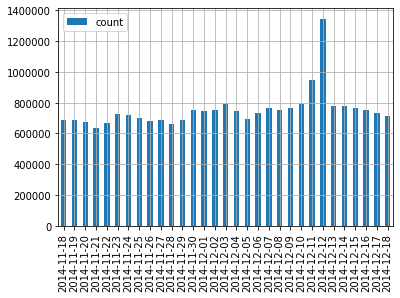

In [37]:
import matplotlib.pyplot as plt
data_count_day =pd.DataFrame.from_dict(count_day,orient='index',columns=['count'])
data_count_day['count'].plot(kind = 'bar')
plt.legend(loc='best')
plt.grid(True)
plt.show()

2014-12-12 00
2014-12-12 01
2014-12-12 02
2014-12-12 03
2014-12-12 04
2014-12-12 05
2014-12-12 06
2014-12-12 07
2014-12-12 08
2014-12-12 09
2014-12-12 10
2014-12-12 11
2014-12-12 12
2014-12-12 13
2014-12-12 14
2014-12-12 15
2014-12-12 16
2014-12-12 17
2014-12-12 18
2014-12-12 19
2014-12-12 20
2014-12-12 21
2014-12-12 22
2014-12-12 23
{'2014-12-12 00': [87638, 1180, 4705, 4407], '2014-12-12 01': [38217, 509, 1487, 865], '2014-12-12 02': [21510, 365, 751, 491], '2014-12-12 03': [13100, 194, 442, 243], '2014-12-12 04': [9901, 140, 440, 222], '2014-12-12 05': [11494, 119, 485, 259], '2014-12-12 06': [23482, 295, 797, 545], '2014-12-12 07': [37956, 492, 1319, 881], '2014-12-12 08': [50923, 804, 1910, 1363], '2014-12-12 09': [53342, 697, 2223, 1659], '2014-12-12 10': [60806, 917, 2441, 1666], '2014-12-12 11': [54636, 864, 2098, 1603], '2014-12-12 12': [54835, 983, 2008, 1289], '2014-12-12 13': [60916, 1116, 2348, 1507], '2014-12-12 14': [53294, 991, 2022, 1163], '2014-12-12 15': [54780, 924,

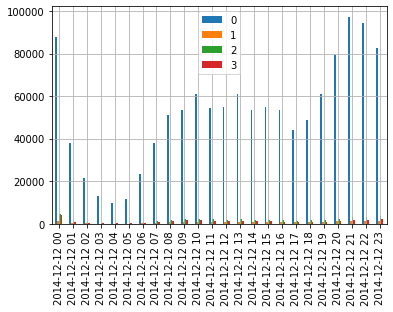

In [45]:
def show_count_hour(date1):
    count_hour ={}
    for i in range(24):
        time_str =date1 +' %02.d' % i
        count_hour[time_str] =[0, 0, 0, 0]
        temp = data[time_str]['behavior_type'].value_counts()
        for j in range(len(temp)):
            count_hour[time_str][temp.index[j]-1] +=temp[temp.index[j]]
            
        print(time_str)
    print(count_hour)
    
    data_count_hour = pd.DataFrame.from_dict(count_hour,orient = 'index')
    data_count_hour.plot(kind = 'bar')
    plt.legend(loc = 'best')
    plt.grid(True)
    plt.show()
show_count_hour('2014-12-12')
